**Setup Python 3.8 on Colab Environment.**

In [1]:
!sudo apt-get update -y
!sudo apt-get install python3.8
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2
!python --version
!sudo apt-get install python3-pip
!python -m pip install --upgrade pip
!pip install ipykernel

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bi

**Installing OpeNTF**

In [2]:
%rm -R opentf/
!git clone https://github.com/fani-lab/opentf
%cd opentf/
!pip install -r requirements.txt
%cd src/

rm: cannot remove 'opentf/': No such file or directory
Cloning into 'opentf'...
remote: Enumerating objects: 3096, done.
remote: Counting objects: 100% (3096/3096), done.
remote: Compressing objects: 100% (2177/2177), done.
remote: Total 3096 (delta 1346), reused 2475 (delta 876), pack-reused 0
Receiving objects: 100% (3096/3096), 34.42 MiB | 16.97 MiB/s, done.
Resolving deltas: 100% (1346/1346), done.
/content/opentf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 879.5/881.9 MB 119.8 MB/s eta 0:00:01tcmalloc: large alloc 1102422016 bytes == 0x3769a000 @  0x7fabe873b615 0x4f69ad 0x5aa051 0x5a9f83 0x5d290c 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x4fa54a 0x556ea9 0x555bc0 0x4fa5dd 0x557802 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 40.2 MB/s eta 0:0

/content/opentf/src


**Default Hyperparameters**

In [3]:
!cat param.py

import random
import torch
import numpy as np

random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

np.random.seed(0)

settings = {
    'model':{
        'baseline': {
            'random': {
                'b': 4096
            },
            'fnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': None,  # number of negative samples
                'ns': None,  # 'uniform', 'unigram', 'unigram_b'
            },
            'bnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': None,  # number of negative samples
                'ns': None,  # 'uniform', 'unigram', 'unigram_b'
                's': 1  # # sample_elbo for bnn
            },
           

**Sample benchmark on toy dataset of dblp for non-Bayesian Feedforward (fnn) and Bayesian (bnn) models**

In [4]:
!python main.py -data data/raw/dblp/toy.dblp.v12.json -domain dblp -model fnn bnn

Loading sparse matrices from ./../data/preprocessed/dblp/toy.dblp.v12.json/teamsvecs.pkl ...
Loading indexes pickle from ./../data/preprocessed/dblp/toy.dblp.v12.json/indexes.pkl ...
It took 0.00014591217041015625 seconds to load from the pickles.
It took 0.0005815029144287109 seconds to load the sparse matrices.
Fold 0/2, Epoch 0/19, Minibatch 0/0, Phase train, Running Loss train 179.6209716796875, Time 0.006792783737182617, Overall 0.009304523468017578 
Fold 0/2, Epoch 0/19, Running Loss train 11.226310729980469, Time 0.006914615631103516, Overall 0.00942540168762207 
Fold 0/2, Epoch 0/19, Minibatch 0/0, Phase valid, Running Loss valid 85.39894104003906, Time 0.009008169174194336, Overall 0.0115203857421875 
Fold 0/2, Epoch 0/19, Running Loss valid 9.488771226671007, Time 0.009125232696533203, Overall 0.011635780334472656 
Fold 0/2, Epoch 1/19, Minibatch 0/0, Phase train, Running Loss train 132.85679626464844, Time 0.01363682746887207, Overall 0.016148090362548828 
Fold 0/2, Epoch 1/

**Benchmark Output Folder on toy.dblp for Baselines**

In [5]:
%cd ../output/toy.dblp.v12.json/
!ls

/content/opentf/output/toy.dblp.v12.json
bnn  bnn_emb  fnn  fnn_emb  random


**Let's look at the Bayesian Results**

{\#team:30, \#skills:11, \#members:12, layers:\[100\], learning rate:0.1, batch size:4096, epoch:20, elbo samples:1\}

In [6]:
%cd bnn/t30.s11.m12.l\[100\].lr0.1.b4096.e20.s1
!ls

/content/opentf/output/toy.dblp.v12.json/bnn/t30.s11.m12.l[100].lr0.1.b4096.e20.s1
f0.test.pred		    state_dict_model.f1.e15.pt
f0.test.pred.eval.mean.csv  state_dict_model.f1.e16.pt
f0.test.pred.eval.roc.pkl   state_dict_model.f1.e17.pt
f0.train_valid_loss.png     state_dict_model.f1.e18.pt
f1.test.pred		    state_dict_model.f1.e19.pt
f1.test.pred.eval.mean.csv  state_dict_model.f1.e1.pt
f1.test.pred.eval.roc.pkl   state_dict_model.f1.e2.pt
f1.train_valid_loss.png     state_dict_model.f1.e3.pt
f2.test.pred		    state_dict_model.f1.e4.pt
f2.test.pred.eval.mean.csv  state_dict_model.f1.e5.pt
f2.test.pred.eval.roc.pkl   state_dict_model.f1.e6.pt
f2.train_valid_loss.png     state_dict_model.f1.e7.pt
state_dict_model.f0.e0.pt   state_dict_model.f1.e8.pt
state_dict_model.f0.e10.pt  state_dict_model.f1.e9.pt
state_dict_model.f0.e11.pt  state_dict_model_f1.pt
state_dict_model.f0.e12.pt  state_dict_model.f2.e0.pt
state_dict_model.f0.e13.pt  state_dict_model.f2.e10.pt
state_dict_model.f0.e14.pt

**ROC Plot for 3-Fold Cross-Validated Models on Test Set**

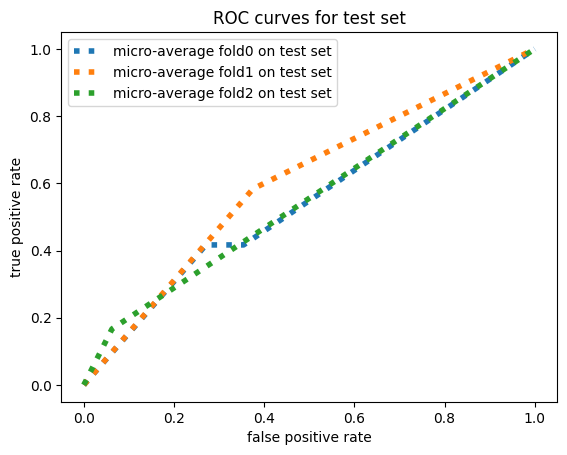

In [7]:
from IPython.display import Image
Image('test.roc.png')

In [9]:
import pandas as pd
pd.read_csv('test.pred.eval.mean.csv')

,Unnamed: 0,0
0,P_2,0.233333
1,P_5,0.226667
2,P_10,0.186667
3,recall_2,0.177778
4,recall_5,0.455556
5,recall_10,0.777778
6,ndcg_cut_2,0.240876
7,ndcg_cut_5,0.350109
8,ndcg_cut_10,0.481924
9,map_cut_2,0.138889
